In [1]:

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = {
    "Bedrooms": [2, 3, 4, 3, 5, 4, 2, 3, 4, 5],
    "Bathrooms": [1, 2, 2, 1, 3, 2, 1, 2, 3, 3],
    "Area_sqft": [900, 1200, 1500, 1100, 2000, 1600, 850, 1300, 1800, 2200],
    "House_Age": [10, 5, 3, 15, 2, 6, 20, 8, 4, 1],
    "Price": [120000, 180000, 240000, 160000, 320000, 260000, 110000, 190000, 300000, 360000]
}

df = pd.DataFrame(data)
df

,Bedrooms,Bathrooms,Area_sqft,House_Age,Price
0,2,1,900,10,120000
1,3,2,1200,5,180000
2,4,2,1500,3,240000
3,3,1,1100,15,160000
4,5,3,2000,2,320000
5,4,2,1600,6,260000
6,2,1,850,20,110000
7,3,2,1300,8,190000
8,4,3,1800,4,300000
9,5,3,2200,1,360000


In [3]:
print(df.shape)
df.info()

# Summary statistics
df.describe()


(10, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Bedrooms   10 non-null     int64
 1   Bathrooms  10 non-null     int64
 2   Area_sqft  10 non-null     int64
 3   House_Age  10 non-null     int64
 4   Price      10 non-null     int64
dtypes: int64(5)
memory usage: 532.0 bytes


,Bedrooms,Bathrooms,Area_sqft,House_Age,Price
count,10.000000,10.000000,10.000000,10.00000,10.000000
mean,3.500000,2.000000,1445.000000,7.40000,224000.000000
std,1.080123,0.816497,457.317055,6.07728,85660.829892
min,2.000000,1.000000,850.000000,1.00000,110000.000000
25%,3.000000,1.250000,1125.000000,3.25000,165000.000000
50%,3.500000,2.000000,1400.000000,5.50000,215000.000000
75%,4.000000,2.750000,1750.000000,9.50000,290000.000000
max,5.000000,3.000000,2200.000000,20.00000,360000.000000


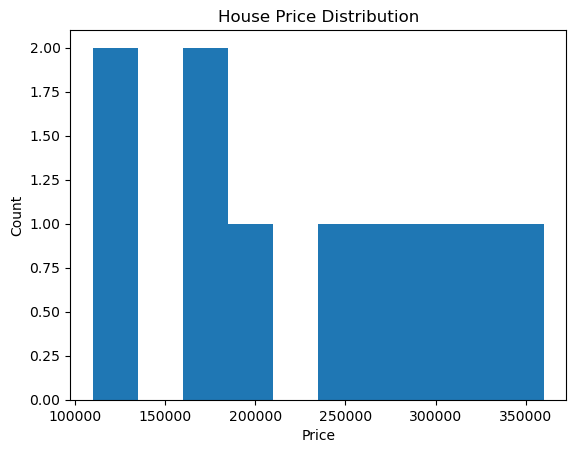

In [4]:
plt.hist(df["Price"])
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()



In [5]:
X = df[["Bedrooms", "Bathrooms", "Area_sqft", "House_Age"]]
y = df["Price"]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train, X_test, y_train, y_test


(   Bedrooms  Bathrooms  Area_sqft  House_Age
 0         2          1        900         10
 7         3          2       1300          8
 2         4          2       1500          3
 9         5          3       2200          1
 4         5          3       2000          2
 3         3          1       1100         15
 6         2          1        850         20,
    Bedrooms  Bathrooms  Area_sqft  House_Age
 8         4          3       1800          4
 1         3          2       1200          5
 5         4          2       1600          6,
 0    120000
 7    190000
 2    240000
 9    360000
 4    320000
 3    160000
 6    110000
 Name: Price, dtype: int64,
 8    300000
 1    180000
 5    260000
 Name: Price, dtype: int64)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = model.predict(X_test)

print("Predicted:", y_pred)
print("Actual:", list(y_test))


Predicted: [278580.23538203 174584.61210002 252603.07971498]
Actual: [300000, 180000, 260000]


In [9]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Squared Error: 180949057.36648273
Root Mean Squared Error: 13451.730645775016
R² Score: 0.927297253736681


In [10]:
custom_house = pd.DataFrame({
    "Bedrooms": [3],
    "Bathrooms": [2],
    "Area_sqft": [1400],
    "House_Age": [5]
})

predicted_price = model.predict(custom_house)
print("Predicted House Price:", predicted_price[0])

Predicted House Price: 210039.23033812843
